In [82]:
import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point
from geopandas import GeoDataFrame
import os
import seaborn as sns

pd.set_option("display.max_colwidth", 0)
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
pd.options.display.float_format = '{:.5f}'.format

import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
import logging
import datetime

nblog = open("./logs/explore_localness_"+str(datetime.datetime.now())+".log", "a+")
sys.stdout.echo = nblog
sys.stderr.echo = nblog

get_ipython().log.handlers[0].stream = nblog
get_ipython().log.setLevel(logging.INFO)

%autosave 5

Autosaving every 5 seconds


In [83]:
%%time
df_localness = pd.read_csv('./data/food_localness_final_oct.csv')
print('unique orders:',df_localness.shape[0])
print('unique accounts:',df_localness.account_id.unique().shape[0])
print('unique vendors:',df_localness.vendor_id.unique().shape[0])
df_localness.head(2)

unique orders: 2767286
unique accounts: 555121
unique vendors: 7718
CPU times: user 21.1 s, sys: 4.52 s, total: 25.6 s
Wall time: 28.3 s


,account_id,order_id,order_date,order_time,vendor_id,vendor_name,main_cuisine,vertical,delivery_fee_amount_lc,service_fee_amount_lc,basket_amount_lc,is_incentive_applied,incentive_amount_lc,pickup_id,customer_lon,customer_lat,vendor_lon,vendor_lat,order_time_hour,delivery_duration,total_duration,node_id,nearest_dist1,poi1,n_vertical,n_vendor_id,n_main_cuisine,n_vendor_name,n_vendor_lon,n_vendor_lat,vendor_index,pandana_distance_realdist,pandana_localness,speed,isweekend,price_per_item,customer_loc_id,entropy_0.5km,restaurant_count_0.5km,entropy_1km,poi_count_1km,entropy_2km,poi_count_2km,entropy_3km,poi_count_3km,entropy_4km,poi_count_4km,entropy_5km,poi_count_5km,restaurant_count_0.5_1km,restaurant_count_1_2km,restaurant_count_2_3km,restaurant_count_3_4km,restaurant_count_4_5km,estimated_rent,compensation,discounted delivery,free delivery,gem,item discount,menu discount,voucher wallet,incentives_type,incentive_delivery,incentive_menu_discount,incentive_voucher_wallet,rating,n_rating,total_orders,consistency
0,7051337,1305576462,2023-10-10,2023-10-10 15:30:22,50868,"SHAGHF, Jumeirah 3",coffee,food,0.00000,1.73000,57.75000,True,10.00000,249162013.00000,55.21388,25.15585,55.23119,25.18903,15,17,27,7584090309,0.65435,840,food,697762,coffee,"Awaken Cafe, Al Wasl",55.21303,25.15146,840,4.61510,0.14179,10.25355,No,30.06471,55.21387725.155851,0.00000,0.00000,0.47137,21.00000,0.65855,105.00000,0.66518,198.00000,0.69070,296.00000,0.70457,582.00000,21.00000,84.00000,93.00000,98.00000,286.00000,90.44289,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,10.00000,voucher wallet,No,No,Yes,1.Amazing,5.None,58,0.85783
1,7051337,1313167366,2023-10-16,2023-10-16 16:43:34,50868,"SHAGHF, Jumeirah 3",coffee,food,7.50000,0.90000,26.25000,True,10.00000,250948408.00000,55.21389,25.15572,55.23119,25.18903,16,13,31,7584090309,0.65435,840,food,697762,coffee,"Awaken Cafe, Al Wasl",55.21303,25.15146,840,4.61510,0.14179,8.93051,No,30.06471,55.213885121047525.1557155663109,0.00000,0.00000,0.47137,21.00000,0.65855,105.00000,0.66603,197.00000,0.69169,295.00000,0.70585,587.00000,21.00000,84.00000,92.00000,98.00000,292.00000,90.65273,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,10.00000,voucher wallet,No,No,Yes,1.Amazing,5.None,58,0.85783


In [4]:
print('Percentage of incentivized orders: ',df_localness[df_localness.incentive_amount_lc>0].shape[0]/df_localness.shape[0]*100)
print('Percentage of localness=1:',df_localness[df_localness.pandana_localness>=1].shape[0]/df_localness.shape[0]*100)

Percentage of incentivized orders:  37.47787543463162
Percentage of localness=1: 4.1142115415609375


# Descriptive statistics

In [81]:
df_localness.consistency.describe()

count   2767286.00000
mean    0.74757      
std     0.31246      
min     0.00000      
25%     0.73121      
50%     0.86994      
75%     0.93622      
max     1.00000      
Name: consistency, dtype: float64

In [80]:
df_localness.isweekend.value_counts(normalize=True).sort_index(ascending=False)

Yes   0.31463
No    0.68537
Name: isweekend, dtype: float64

In [77]:
170201/2767286.00000

0.061504665582090175

# Distribution of localness

count   2767286.00000
mean    5.64242      
std     4.06497      
min     0.00100      
25%     2.47065      
50%     4.74789      
75%     7.98122      
max     46.27418     
Name: pandana_distance_realdist, dtype: float64


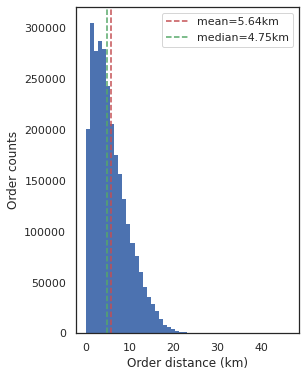

In [113]:
sns.set_theme(rc={'figure.figsize':(4,6)},style='white') 
plt.rcParams.update({'font.size': 14})
print(df_localness['pandana_distance_realdist'].describe())
ax = df_localness['pandana_distance_realdist'].hist(bins=50,ec='None')
ax.grid(False)
# plt.title('Food order distance (km) (n='+str(df_nearest_compute.shape[0])+')')
meanv = round(df_localness['pandana_distance_realdist'].mean(),2)
medianv = round(df_localness['pandana_distance_realdist'].median(),2)
plt.axvline(x=meanv,color='r',label='mean='+str(meanv)+'km',ls='--')
plt.axvline(x=medianv,color='g',label='median='+str(medianv)+'km',ls='--')
plt.ylabel('Order counts')
plt.xlabel('Order distance (km)')
plt.legend()
plt.savefig('./output/plot_orderdistance.pdf', bbox_inches="tight")

count    2767286.000000
mean     0.338345      
std      0.307076      
min      0.000029      
25%      0.095152      
50%      0.230439      
75%      0.508636      
max      1.000000      
Name: pandana_localness, dtype: object


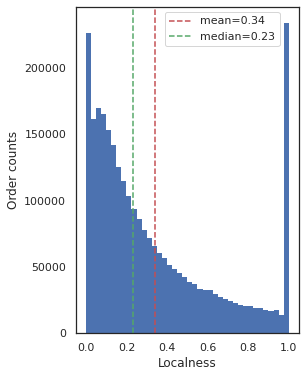

In [115]:
sns.set_theme(rc={'figure.figsize':(4,6)},style='white') 
plt.rcParams.update({'font.size': 14})
print(df_localness['pandana_localness'].describe().apply(lambda x: format(x, 'f')))
ax = df_localness['pandana_localness'].hist(bins=40,ec='None')
ax.grid(False)
meanv = round(df_localness['pandana_localness'].mean(),2)
medianv = round(df_localness['pandana_localness'].median(),2)
plt.axvline(x=meanv,color='r',label='mean='+str(meanv),ls='--')
plt.axvline(x=medianv,color='g',label='median='+str(medianv),ls='--')
plt.legend(loc=(0.4,0.88)) #loc=(0.4,0.85)
# plt.title('Food order localness (n='+str(df_nearest_compute.shape[0])+')')
plt.ylabel('Order counts')
plt.xlabel('Localness')
plt.savefig('./output/plot_localness.pdf', bbox_inches="tight")

count   2767286.00000
mean    1.48226      
std     1.82575      
min     0.00100      
25%     0.41658      
50%     0.90772      
75%     1.82504      
max     27.19615     
Name: nearest_dist1, dtype: float64


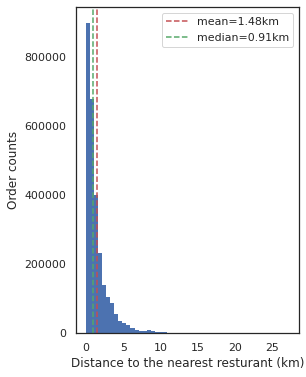

In [116]:
sns.set_theme(rc={'figure.figsize':(4,6)},style='white') 
plt.rcParams.update({'font.size': 14})
print(df_localness['nearest_dist1'].describe())
ax = df_localness['nearest_dist1'].hist(bins=50,ec='None')
ax.grid(False)
# plt.title('Food order distance (km) (n='+str(df_nearest_compute.shape[0])+')')
meanv = round(df_localness['nearest_dist1'].mean(),2)
medianv = round(df_localness['nearest_dist1'].median(),2)
plt.axvline(x=meanv,color='r',label='mean='+str(meanv)+'km',ls='--')
plt.axvline(x=medianv,color='g',label='median='+str(medianv)+'km',ls='--')
plt.ylabel('Order counts')
plt.xlabel('Distance to the nearest resturant (km)')
plt.legend()
plt.savefig('./output/plot_distance_to_nearest.pdf', bbox_inches="tight")

In [117]:
top10 = df_localness.groupby('main_cuisine').pandana_localness.mean().sort_values(ascending=False).head(10).index.tolist()
tail20 = df_localness.groupby('main_cuisine').pandana_localness.mean().sort_values(ascending=False).tail(20).index.tolist()

CPU times: user 2.11 s, sys: 8.67 s, total: 10.8 s
Wall time: 10.6 s


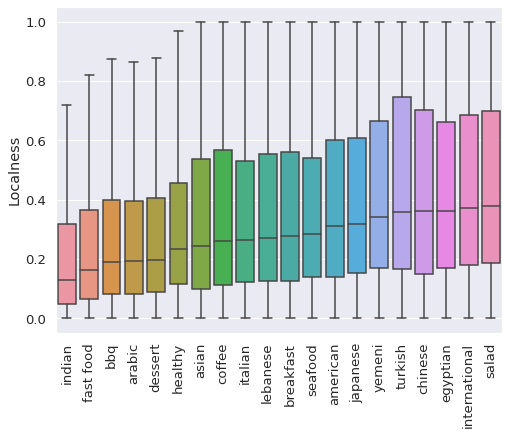

In [118]:
%%time
df_localness_select10 = df_localness[df_localness['main_cuisine'].isin(tail20)]
sns.set_theme(rc={'figure.figsize':(8,6)},font_scale=1.2)
# sns.violinplot(data=df_nearest_compute,x='main_cuisine',y='localness')
my_order = df_localness_select10.groupby(by=["main_cuisine"])["pandana_localness"].median().sort_values().index
sns.boxplot(data=df_localness_select10,x='main_cuisine',y='pandana_localness',order=my_order, showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Localness')
plt.savefig('./output/plot_tenleastlocalcusines.pdf', bbox_inches="tight")

# Time of day pattern of food order localness

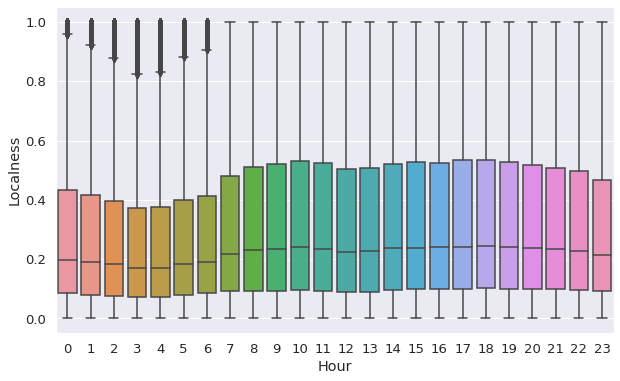

In [119]:
sns.set_theme(rc={'figure.figsize':(10,6)},font_scale=1.2)
sns.boxplot(data=df_localness,x='order_time_hour',y='pandana_localness')
# plt.xticks() # rotation=90
plt.xlabel('Hour')
plt.ylabel('Localness')
plt.savefig('./output/plot_localness_timeofday.pdf', bbox_inches="tight")

Text(0, 0.5, 'Order distance (km)')

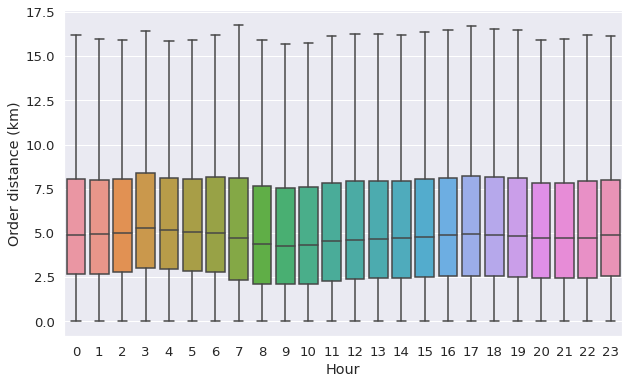

In [120]:
sns.set_theme(rc={'figure.figsize':(10,6)},font_scale=1.2)
sns.boxplot(data=df_localness,x='order_time_hour',y='pandana_distance_realdist', showfliers=False)
# plt.title('Order travel distance (km)')
plt.xlabel('Hour')
plt.ylabel('Order distance (km)')

# Total distance change if all orders were from the nearest restaurant
Economic cost of localness - delivery travel distance perspective

In [5]:
df_quantifycost = df_localness[['pandana_localness','pandana_distance_realdist','nearest_dist1']]
df_quantifycost.head(2)

,pandana_localness,pandana_distance_realdist,nearest_dist1
0,0.14179,4.61510,0.65435
1,0.14179,4.61510,0.65435


In [6]:
for i in range(1,11,1):
    field = 'delta_percent' + str(i)
    step = i/10 # increment is 0.1 of localness
    df_quantifycost[field] = df_quantifycost['nearest_dist1']/(df_quantifycost['pandana_localness'] + step)
    df_quantifycost.loc[df_quantifycost[field]<=df_quantifycost['nearest_dist1'],field] = df_quantifycost['nearest_dist1']
    df_quantifycost[field] = (df_quantifycost['pandana_distance_realdist']-df_quantifycost[field])/df_quantifycost['pandana_distance_realdist']
    df_quantifycost.loc[df_quantifycost[field]<=0,field] = 0

In [7]:
for i in range(1,11,1):
    field2 = 'estimate_dist' + str(i)
    step = i/10 # increment is 0.1 of localness
    df_quantifycost[field2] = df_quantifycost['nearest_dist1']/(df_quantifycost['pandana_localness'] + step)
    df_quantifycost.loc[df_quantifycost[field2]<=df_quantifycost['nearest_dist1'],field2] = df_quantifycost['nearest_dist1']

In [8]:
df_quantifycost.head(2)

,pandana_localness,pandana_distance_realdist,nearest_dist1,delta_percent1,delta_percent2,delta_percent3,delta_percent4,delta_percent5,delta_percent6,delta_percent7,delta_percent8,delta_percent9,delta_percent10,estimate_dist1,estimate_dist2,estimate_dist3,estimate_dist4,estimate_dist5,estimate_dist6,estimate_dist7,estimate_dist8,estimate_dist9,estimate_dist10
0,0.14179,4.61510,0.65435,0.41359,0.58516,0.67906,0.73830,0.77908,0.80886,0.83157,0.84945,0.85821,0.85821,2.70634,1.91452,1.48116,1.20777,1.01958,0.88213,0.77734,0.69480,0.65435,0.65435
1,0.14179,4.61510,0.65435,0.41359,0.58516,0.67906,0.73830,0.77908,0.80886,0.83157,0.84945,0.85821,0.85821,2.70634,1.91452,1.48116,1.20777,1.01958,0.88213,0.77734,0.69480,0.65435,0.65435


In [9]:
df_quantifycost_melt_percent = pd.melt(df_quantifycost[['delta_percent1', 'delta_percent2', 'delta_percent3', 'delta_percent4', 
                                           'delta_percent5', 'delta_percent6', 'delta_percent7', 'delta_percent8', 'delta_percent9', 'delta_percent10']])

df_quantifycost_melt_distancechange = pd.melt(df_quantifycost[['pandana_distance_realdist', 'estimate_dist1', 'estimate_dist2', 'estimate_dist3',
                                                               'estimate_dist4', 'estimate_dist5', 'estimate_dist6', 'estimate_dist7', 'estimate_dist8', 
                                                               'estimate_dist9', 'estimate_dist10']])

CPU times: user 11.8 s, sys: 544 ms, total: 12.4 s
Wall time: 23.8 s


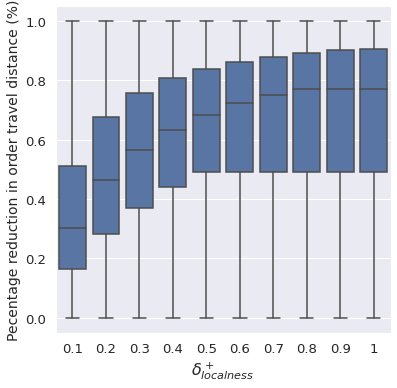

In [45]:
%%time 
sns.set_theme(rc={'figure.figsize':(6,6)},font_scale=1.2)
ax = sns.boxplot(x="variable", y="value", data=df_quantifycost_melt_percent,showfliers=False,color="#4c72b0")
plt.xlabel(r'$\delta^+_{localness}$', fontsize=16)
plt.ylabel('Pecentage reduction in order travel distance (%)', fontsize=14)
ax.set_xticklabels([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.savefig('./output/change_localness_percent.pdf', bbox_inches='tight')

CPU times: user 13.1 s, sys: 694 ms, total: 13.8 s
Wall time: 22.1 s


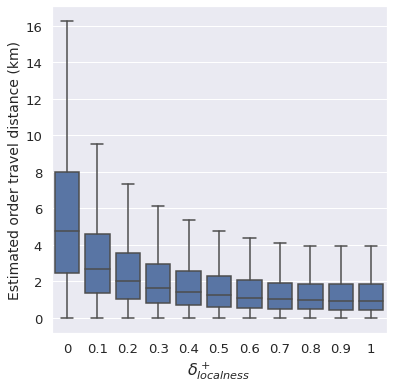

In [44]:
%%time 
sns.set_theme(rc={'figure.figsize':(6,6)},font_scale=1.2)
ax = sns.boxplot(x="variable", y="value", data=df_quantifycost_melt_distancechange,showfliers=False,color="#4c72b0")
plt.xlabel(r'$\delta^+_{localness}$', fontsize=16)
plt.ylabel('Estimated order travel distance (km)', fontsize=14)
ax.set_xticklabels([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.savefig('./output/change_localness_distance.pdf', bbox_inches='tight')

In [62]:
print(df_quantifycost.pandana_distance_realdist.median(),df_quantifycost.pandana_distance_realdist.mean())
print(df_quantifycost.estimate_dist1.median(),df_quantifycost.estimate_dist1.mean())
print(df_quantifycost.estimate_dist10.median(),df_quantifycost.estimate_dist10.mean())

4.7478935 5.6424169143055725
2.679824901429674 3.3094217479090435
0.9077230224609376 1.4822587222431372


In [61]:
print(df_quantifycost.delta_percent10.median(),df_quantifycost.delta_percent10.mean())

0.7695614633293401 0.661654522811728


In [54]:
df_quantifycost.pandana_localness.mean()

0.3383454780112123

In [53]:
df_quantifycost.pandana_distance_realdist.mean()

5.6424169143055725

In [49]:
df_quantifycost.estimate_dist10.mean()

1.4822587222431372

# OLS

In [4]:
import statsmodels.api as sm

In [5]:
df_localness.columns

Index(['account_id', 'order_id', 'order_date', 'order_time', 'vendor_id', 'vendor_name', 'main_cuisine', 'vertical', 'delivery_fee_amount_lc', 'service_fee_amount_lc', 'basket_amount_lc', 'is_incentive_applied', 'incentive_amount_lc', 'pickup_id', 'customer_lon', 'customer_lat', 'vendor_lon', 'vendor_lat', 'order_time_hour', 'delivery_duration', 'total_duration', 'node_id', 'nearest_dist1', 'poi1', 'n_vertical', 'n_vendor_id', 'n_main_cuisine', 'n_vendor_name', 'n_vendor_lon', 'n_vendor_lat', 'vendor_index', 'pandana_distance_realdist', 'pandana_localness', 'speed', 'isweekend', 'price_per_item', 'customer_loc_id', 'entropy_0.5km', 'restaurant_count_0.5km', 'entropy_1km', 'poi_count_1km', 'entropy_2km', 'poi_count_2km', 'entropy_3km', 'poi_count_3km', 'entropy_4km', 'poi_count_4km', 'entropy_5km', 'poi_count_5km', 'restaurant_count_0.5_1km', 'restaurant_count_1_2km', 'restaurant_count_2_3km', 'restaurant_count_3_4km', 'restaurant_count_4_5km', 'estimated_rent', 'compensation',
       '

In [6]:
df_localness.rename(columns={"restaurant_count_0.5_1km": "restaurant_count_05_1km",
                             "entropy_0.5km": "entropy_05km",
                             "restaurant_count_0.5km": "restaurant_count_05km"
                            }, inplace=True)

In [10]:
df_localness['log_pandana_localness'] = np.log(df_localness['pandana_localness']+0.0000001)

In [11]:
df_localness.log_pandana_localness.describe()

count   2767286.00000
mean    -1.79770     
std     1.72109      
min     -10.44724    
25%     -2.35228     
50%     -1.46777     
75%     -0.67602     
max     0.00000      
Name: log_pandana_localness, dtype: float64

In [7]:
%%time
from statsmodels.formula.api import ols

# Fit the linear regression model
model = ols('pandana_localness ~ customer_lon + customer_lat + order_time_hour + total_duration + estimated_rent +  entropy_05km+ entropy_2km + entropy_5km + consistency + \
total_orders + incentive_amount_lc +  restaurant_count_05km + restaurant_count_05_1km + restaurant_count_1_2km + restaurant_count_2_3km + \
restaurant_count_3_4km + restaurant_count_4_5km + basket_amount_lc + price_per_item + C(isweekend) + C(incentive_delivery) + C(incentive_menu_discount) + \
C(incentive_voucher_wallet) + C(rating) + C(n_rating) + C(main_cuisine)', data=df_localness).fit()

# Print the model summary with significance levels
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      pandana_localness   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                 1.074e+04
Date:                Wed, 03 Jul 2024   Prob (F-statistic):               0.00
Time:                        12:20:56   Log-Likelihood:            -2.2131e+05
No. Observations:             2767286   AIC:                         4.428e+05
Df Residuals:                 2767189   BIC:                         4.441e+05
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [17]:
# %%time
# from statsmodels.formula.api import ols

# # Fit the linear regression model
# model = ols('log_pandana_localness ~ order_time_hour + total_duration + estimated_rent +  entropy_05km+ entropy_2km + entropy_5km + consistency + \
# total_orders + incentive_amount_lc +  restaurant_count_05km + restaurant_count_05_1km + restaurant_count_1_2km + restaurant_count_2_3km + \
# restaurant_count_3_4km + restaurant_count_4_5km + basket_amount_lc + price_per_item + C(isweekend) + C(incentive_delivery) + C(incentive_menu_discount) + \
# C(incentive_voucher_wallet) + C(rating) + C(n_rating) + C(main_cuisine)', data=df_localness).fit()

# # Print the model summary with significance levels
# print(model.summary())

In [12]:
# df_localness.rating.value_counts()

2.Very good    1593856
1.Amazing      737925 
5.None         388748 
3.Good         46401  
4.OK           356    
Name: rating, dtype: int64

In [13]:
# df_localness.n_rating.value_counts()

2.Very good    1490883
5.None         574897 
1.Amazing      563732 
3.Good         130681 
4.OK           7093   
Name: n_rating, dtype: int64